In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
to_train=pd.read_csv('input/train_time.csv')

In [3]:
to_train.head()

,id,label,college,rank,total_people,rank_percent,countM1,price_sumM1,price_avgM1,price_maxM1,...,地点263_avg,地点263_max,地点263_min,地点263_median,地点840_count,地点840_sum,地点840_avg,地点840_max,地点840_min,地点840_median
0,0,0.0,9.0,1.0,2933.0,0.000341,49.0,201.31,4.108367,36.4,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0
1,1,0.0,9.0,2.0,2933.0,0.000682,-1.0,-1.00,-1.000000,-1.0,...,-1.0,-1.0,-1.0,-1.0,19.0,117.0,6.157895,7.0,4.0,6.0
2,8,0.0,6.0,1565.0,1570.0,0.996815,97.0,347.74,3.584948,10.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0
3,9,0.0,6.0,1570.0,1570.0,1.000000,98.0,491.01,5.010306,17.5,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0
4,10,0.0,3.0,1.0,2304.0,0.000434,27.0,82.96,3.072593,22.3,...,-1.0,-1.0,-1.0,-1.0,2.0,7.0,3.500000,4.0,3.0,3.5


In [4]:
to_train['label'].value_counts()

0.0       9325
1000.0     741
1500.0     465
2000.0     354
Name: label, dtype: int64

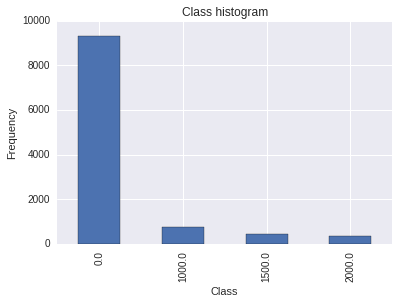

In [5]:
count_classes = pd.value_counts(to_train['label'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [6]:
X = to_train.ix[:, to_train.columns != 'label']
y = to_train.ix[:, to_train.columns == 'label']

In [7]:
to_one = 2000

In [8]:
def to_01(x):
    if x != 0:
        return 1
    else:
        return 0

In [9]:
y['label']=y['label'].apply(lambda x : to_01(x))

/home/kuhung/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:
# 这里的采样方式，会造成数据分布变化 // resample to all data

from sklearn.model_selection import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

('Number transactions train dataset: ', 7619)
('Number transactions test dataset: ', 3266)
('Total number of transactions: ', 10885)


In [11]:
X_train.shape

(7619, 431)

In [12]:
train=X_train
train['label']=y_train

train.to_csv('./input/train_binary.csv',index=False)
train=pd.read_csv('./input/train_binary.csv')

/home/kuhung/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [13]:
number_records_fraud = len(train[train.label != 0])
fraud_indices = np.array(train[train.label != 0].index)

# Picking the indices of the normal classes
normal_indices = train[train.label == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = train.iloc[under_sample_indices,:]

X_undersample = under_sample_data.ix[:, under_sample_data.columns != 'label']
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'label']

# Showing ratio
print("Number of normal transactions: ", len(under_sample_data[under_sample_data.label == 0]))
print("Number of fraud transactions: ", len(under_sample_data[under_sample_data.label != 0]))
print("Total number of transactions in resampled data: ", len(under_sample_data))

('Number of normal transactions: ', 1081)
('Number of fraud transactions: ', 1081)
('Total number of transactions in resampled data: ', 2162)


In [14]:
# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 21)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))



('Number transactions train dataset: ', 1513)
('Number transactions test dataset: ', 649)
('Total number of transactions: ', 2162)


In [15]:
nice_feature=pd.read_csv('input/nice_feature.csv',header=None,index_col=0)

target = 'label'
IDcol = 'id'
ids = X_test['id'].values

all_feature = [x for x in train.columns if x not in [target]]
predictors = [ x for x in all_feature if x in nice_feature.index]

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

/home/kuhung/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(len(y_train_data),5,shuffle=False) 

    # Different C parameters
    c_param_range = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold,start=1):

            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C = c_param, penalty = 'l1')

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.ix[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [18]:
best_c = printing_Kfold_scores(X_train_undersample[predictors],y_train_undersample)

-------------------------------------------
('C parameter: ', 0.01)
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.72368421052631582)
('Iteration ', 2, ': recall score = ', 0.72435897435897434)
('Iteration ', 3, ': recall score = ', 0.76973684210526316)
('Iteration ', 4, ': recall score = ', 0.79432624113475181)
('Iteration ', 5, ': recall score = ', 0.80519480519480524)

('Mean recall score ', 0.76346021466402214)

-------------------------------------------
('C parameter: ', 0.1)
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.80263157894736847)
('Iteration ', 2, ': recall score = ', 0.86538461538461542)
('Iteration ', 3, ': recall score = ', 0.85526315789473684)
('Iteration ', 4, ': recall score = ', 0.86524822695035464)
('Iteration ', 5, ': recall score = ', 0.85064935064935066)

('Mean recall score ', 0.84783538596528518)

-------------------------------------------
('C parameter: ', 1)
------------------

In [19]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall: 0.877300613497
F1: 0.802244039271


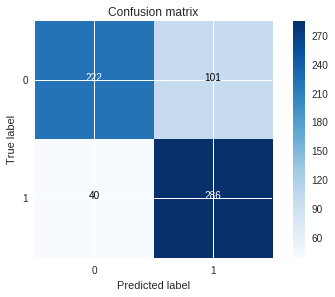

In [20]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
best_c = 1
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample[predictors],y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample[predictors])

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall: %s" %(float(cnf_matrix[1,1])/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("F1: %s" %(float(2*cnf_matrix[1,1])/(cnf_matrix[1,0]+2*cnf_matrix[1,1]+cnf_matrix[0,1])))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()



Recall: 0.872651356994
F1: 0.456082924168


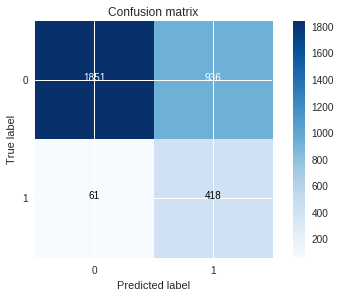

In [21]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample[predictors],y_train_undersample.values.ravel())
y_pred = lr.predict(X_test[predictors])

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall: %s" %(float(cnf_matrix[1,1])/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("F1: %s" %(float(2*cnf_matrix[1,1])/(cnf_matrix[1,0]+2*cnf_matrix[1,1]+cnf_matrix[0,1])))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

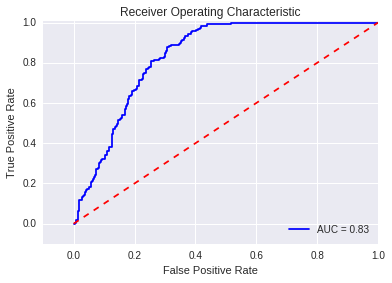

In [22]:
# ROC CURVE
lr = LogisticRegression(C = best_c, penalty = 'l1')
y_pred_undersample_score = lr.fit(X_train_undersample[predictors],y_train_undersample.values.ravel()).decision_function(X_test_undersample[predictors])

fpr, tpr, thresholds = roc_curve(y_test_undersample.values.ravel(),y_pred_undersample_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [23]:
best_c = printing_Kfold_scores(X_train[predictors],y_train)

-------------------------------------------
('C parameter: ', 0.01)
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.080357142857142863)
('Iteration ', 2, ': recall score = ', 0.058035714285714288)
('Iteration ', 3, ': recall score = ', 0.061320754716981132)
('Iteration ', 4, ': recall score = ', 0.071770334928229665)
('Iteration ', 5, ': recall score = ', 0.056603773584905662)

('Mean recall score ', 0.065617544074594719)

-------------------------------------------
('C parameter: ', 0.1)
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.084821428571428575)
('Iteration ', 2, ': recall score = ', 0.0625)
('Iteration ', 3, ': recall score = ', 0.061320754716981132)
('Iteration ', 4, ': recall score = ', 0.066985645933014357)
('Iteration ', 5, ': recall score = ', 0.066037735849056603)

('Mean recall score ', 0.068333113014096142)

-------------------------------------------
('C parameter: ', 1)
--------------------

Recall: 0.0584551148225
F1: 0.100358422939


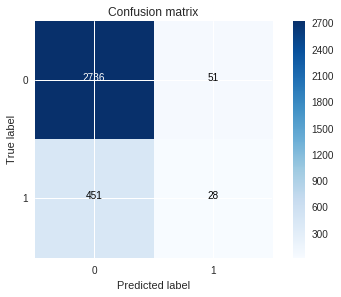

In [24]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train[predictors],y_train.values.ravel())
y_pred_undersample = lr.predict(X_test[predictors])

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall: %s" %(float(cnf_matrix[1,1])/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("F1: %s" %(float(2*cnf_matrix[1,1])/(cnf_matrix[1,0]+2*cnf_matrix[1,1]+cnf_matrix[0,1])))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()



In [25]:
'''
## resample to resample

lr = LogisticRegression(C = 1, penalty = 'l1')
lr.fit(X_train_undersample[predictors],y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample[predictors])


thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    
    print('thresholds %s' %i)
    print("Recall %s" %(float(cnf_matrix[1,1])/(cnf_matrix[1,0]+cnf_matrix[1,1]))),
    print("F1 %s" %(float(2*cnf_matrix[1,1])/(cnf_matrix[1,0]+2*cnf_matrix[1,1]+cnf_matrix[0,1])))
    print(' ')

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

'''

'\n## resample to resample\n\nlr = LogisticRegression(C = 1, penalty = \'l1\')\nlr.fit(X_train_undersample[predictors],y_train_undersample.values.ravel())\ny_pred_undersample_proba = lr.predict_proba(X_test_undersample[predictors])\n\n\nthresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]\n\nplt.figure(figsize=(10,10))\n\nj = 1\nfor i in thresholds:\n    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i\n    \n    plt.subplot(3,3,j)\n    j += 1\n    \n    # Compute confusion matrix\n    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)\n    np.set_printoptions(precision=2)\n    \n    print(\'thresholds %s\' %i)\n    print("Recall %s" %(float(cnf_matrix[1,1])/(cnf_matrix[1,0]+cnf_matrix[1,1]))),\n    print("F1 %s" %(float(2*cnf_matrix[1,1])/(cnf_matrix[1,0]+2*cnf_matrix[1,1]+cnf_matrix[0,1])))\n    print(\' \')\n\n    # Plot non-normalized confusion matrix\n    class_names = [0,1]\n    plot_confusion_matrix(cnf_matrix\n                      


thresholds 0.1
Recall 0.991649269311 Precision 0.228585178056 F1 0.371529135706

thresholds 0.2
Recall 0.979123173278 Precision 0.268153230417 F1 0.421005385996

thresholds 0.24
Recall 0.972860125261 Precision 0.273795534665 F1 0.42732691426

thresholds 0.26
Recall 0.972860125261 Precision 0.275902901125 F1 0.429889298893

thresholds 0.28
Recall 0.970772442589 Precision 0.278443113772 F1 0.432759422987

thresholds 0.3
Recall 0.966597077244 Precision 0.280266343826 F1 0.434537775692

thresholds 0.32
Recall 0.964509394572 Precision 0.284833538841 F1 0.439790575916

thresholds 0.34
Recall 0.958246346555 Precision 0.285981308411 F1 0.440499040307

thresholds 0.36
Recall 0.947807933194 Precision 0.287888395688 F1 0.441634241245

thresholds 0.38
Recall 0.947807933194 Precision 0.290839205637 F1 0.445098039216

thresholds 0.4
Recall 0.935281837161 Precision 0.293193717277 F1 0.446437468859

thresholds 0.46
Recall 0.910229645094 Precision 0.304044630404 F1 0.455828541558

thresholds 0.48
Reca

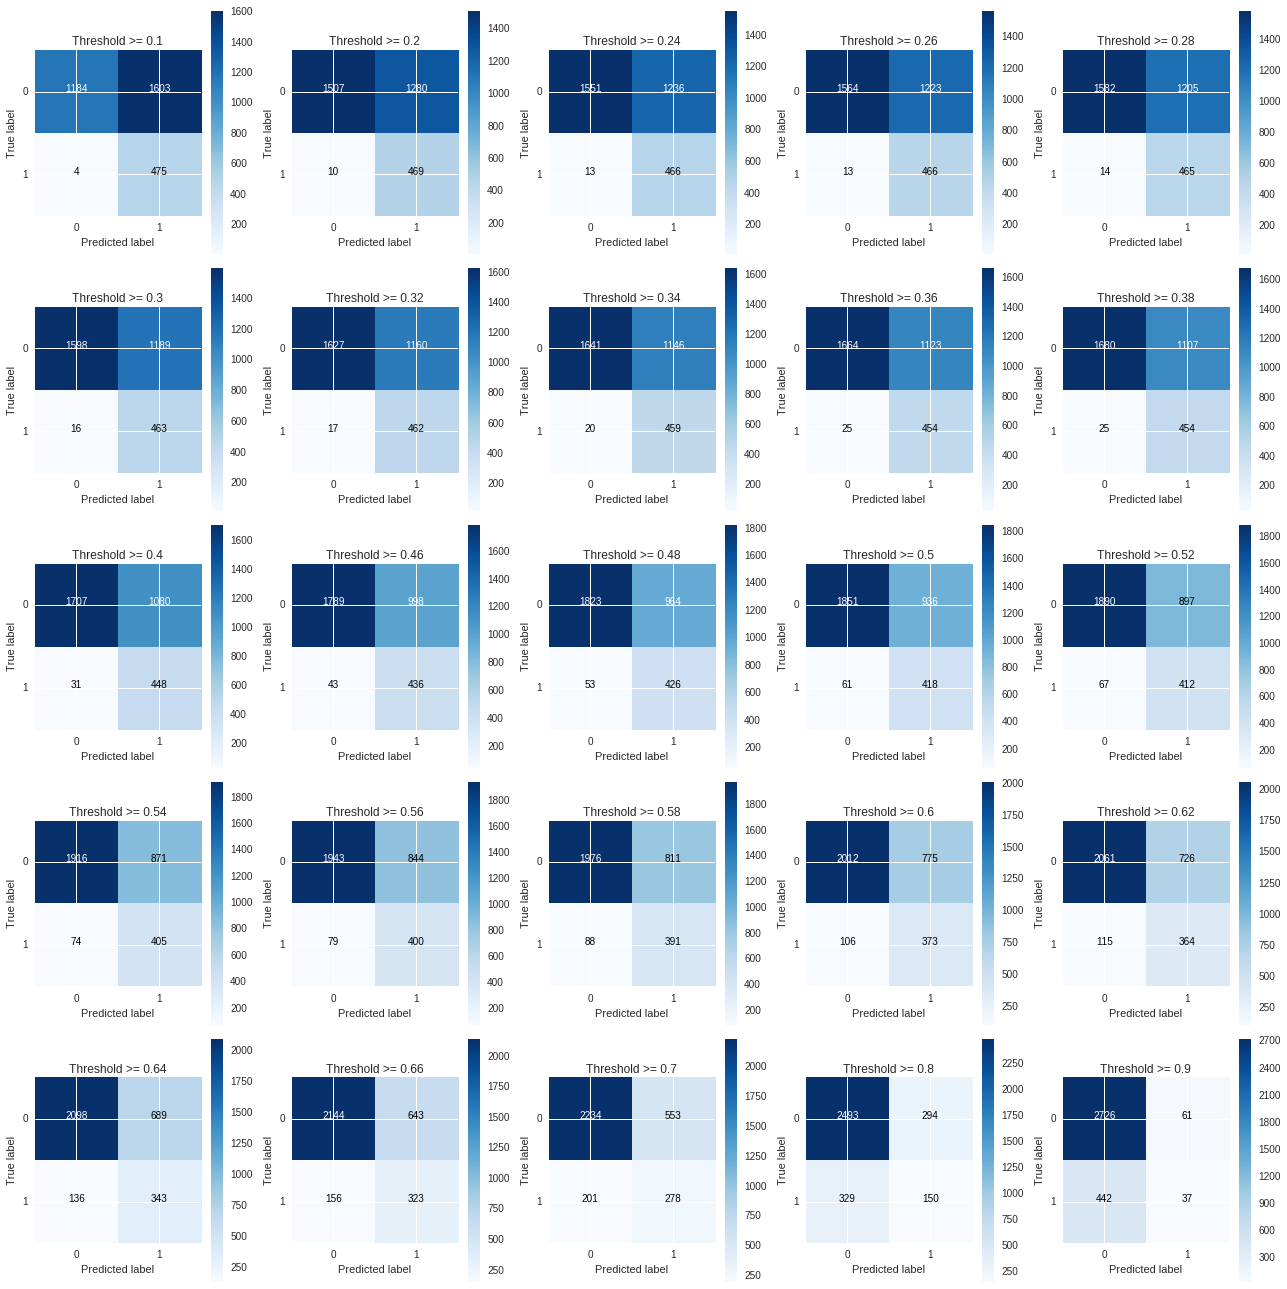

In [26]:
## resample to all data

lr = LogisticRegression(C = 1, penalty = 'l1')
lr.fit(X_train_undersample[predictors],y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test[predictors])


thresholds = [0.1,0.2,0.24,0.26,0.28,0.3,0.32,0.34,0.36,0.38,0.4,0.46,0.48,0.5,0.52,0.54,0.56,0.58,0.6,0.62,0.64,0.66,0.7,0.8,0.9]

plt.figure(figsize=(18,18))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(5,5,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    
    print('\nthresholds %s' %i)
    print("Recall %s" %(float(cnf_matrix[1,1])/(cnf_matrix[1,0]+cnf_matrix[1,1]))),
    print("Precision %s" %(float(cnf_matrix[1,1])/(cnf_matrix[0,1]+cnf_matrix[1,1]))),
    print("F1 %s" %(float(2*cnf_matrix[1,1])/(cnf_matrix[1,0]+2*cnf_matrix[1,1]+cnf_matrix[0,1])))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 



In [27]:
'''
## no resample to all data

lr = LogisticRegression(C = 0.1, penalty = 'l1')
lr.fit(X_train[predictors],y_train.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test[predictors])


thresholds = [0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(4,4,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    
    print('thresholds %s' %i)
    print("Recall %s" %(float(cnf_matrix[1,1])/(cnf_matrix[1,0]+cnf_matrix[1,1]))),
    print("Precision %s" %(float(cnf_matrix[1,1])/(cnf_matrix[0,1]+cnf_matrix[1,1]))),
    print("F1 %s" %(float(2*cnf_matrix[1,1])/(cnf_matrix[1,0]+2*cnf_matrix[1,1]+cnf_matrix[0,1])))
    print(' ')

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

'''

'\n## no resample to all data\n\nlr = LogisticRegression(C = 0.1, penalty = \'l1\')\nlr.fit(X_train[predictors],y_train.values.ravel())\ny_pred_undersample_proba = lr.predict_proba(X_test[predictors])\n\n\nthresholds = [0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.3,0.4,0.5,0.6,0.7,0.8,0.9]\n\nplt.figure(figsize=(10,10))\n\nj = 1\nfor i in thresholds:\n    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i\n    \n    plt.subplot(4,4,j)\n    j += 1\n    \n    # Compute confusion matrix\n    cnf_matrix = confusion_matrix(y_test,y_test_predictions_high_recall)\n    np.set_printoptions(precision=2)\n    \n    print(\'thresholds %s\' %i)\n    print("Recall %s" %(float(cnf_matrix[1,1])/(cnf_matrix[1,0]+cnf_matrix[1,1]))),\n    print("Precision %s" %(float(cnf_matrix[1,1])/(cnf_matrix[0,1]+cnf_matrix[1,1]))),\n    print("F1 %s" %(float(2*cnf_matrix[1,1])/(cnf_matrix[1,0]+2*cnf_matrix[1,1]+cnf_matrix[0,1])))\n    print(\' \')\n\n    # Plot non-normalized confusion matrix\n    c

三个想法：

- 后threshold。多分类后再与threshold取交集。
- 将二分类结果（概率）作为新特征
- 先threshold。threshold改变数据分布后再多分类

best_c=0.1

to_test=pd.read_csv('input/test_time.csv')
to_test.drop(['label'],axis=1,inplace=True)


lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_undersample[predictors],y_undersample[target])
y_pred_undersample_proba = lr.predict_proba(to_test[predictors])


y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > 0.54

to_test['predict']=y_test_predictions_high_recall

def to_score(x):
    if x ==True:
        return 1
    else:
        return 0

to_test['predict']=to_test['predict'].apply(lambda x:to_score(x))

out=pd.DataFrame()
out['id']=to_test['id']
out['predict']=to_test['predict']

test=pd.read_csv('./test/studentID_test.csv',header=None)
test.columns=['id']

out=test.merge(out,on='id',how='outer').fillna(0).astype(int)
out.columns=['studentid','judge']

#out.to_csv('../sub_lr_1.15.csv',index=False)
out.to_csv('output/threshold-plus.csv',index=False)